In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [13]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [18]:
df["MedHouseVal"] = housing.target

In [19]:
# print(housing.data.shape, housing.target.shape)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
df.isnull().sum()
df.fillna(df.median(), inplace=True)

In [23]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

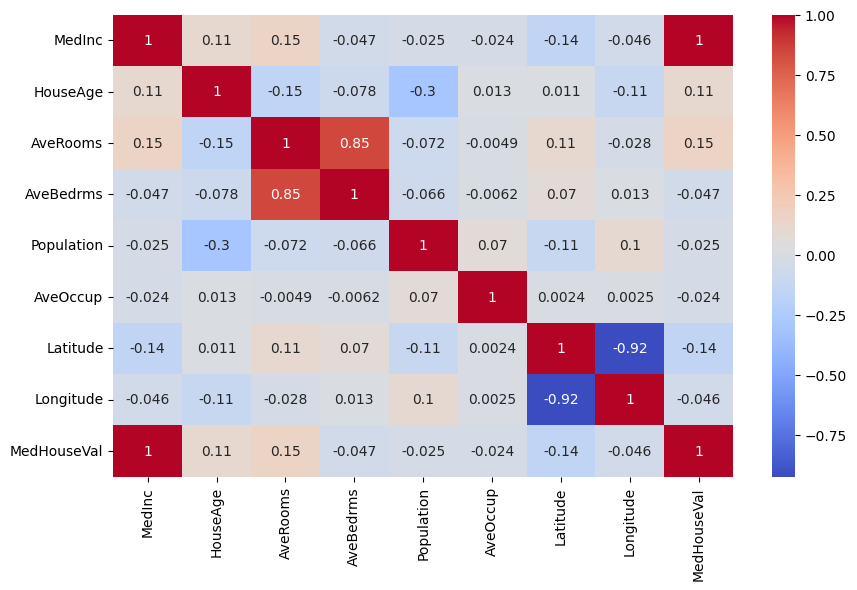

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
snsplt.show()

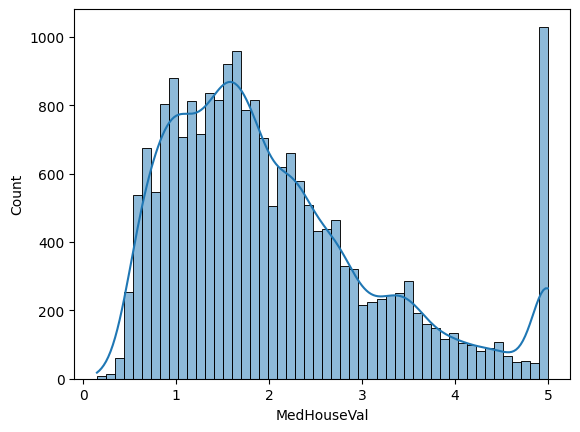

In [28]:
# idk what this is

sns.histplot(df["MedHouseVal"], bins=50, kde=True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0000
